In [7]:
#images/train/jun_matsumoto/のファイル名変更
import glob
import os

path="images/val/jun_matsumoto/*.jpg"
files=glob.glob(path)
idx=180

for i,f in enumerate(files):
    os.rename(f, './images/val/jun_matsumoto/' + str(idx+i) + '.jpg')

In [26]:
#Dlibで顔部分を切り抜き
import cv2, dlib, sys, glob, pprint

#入力ディレクトリ指定
in_dir1="./images/ayaka_takamoto/"
in_dir2="./images/jun_matsumoto/"

#出力ディレクトリ指定
out_dir1="./images/ayaka_takamoto1/"
out_dir2="./images/jun_matsumoto1/"

#画像のID
fid=2000

#入力画像をリサイズするか
flag_resize=False

#Dlibを始める
detector=dlib.get_frontal_face_detector()

#顔画像を取得して保存
def get_face(fname):
    global fid
    img=cv2.imread(fname)

    #サイズが大きければリサイズ
    if flag_resize:
        img=cv2.resize(img, None, fx=0.2, fy=0.2,)

    #顔検出
    dets=detector(img, 1)
    for k,d in enumerate(dets):
        pprint.pprint(d)
        x1=int(d.left())
        y1=int(d.top())
        x2=int(d.right())
        y2=int(d.bottom())
        im=img[y1:y2, x1:x2]
        #64x64にリサイズ
        try:
            im=cv2.resize(im, (64,64))
        except:
            continue

        #保存
        out=out_dir2+"/"+str(fid)+".jpg"
        cv2.imwrite(out, im)
        fid+=1

#ファイルを列挙して繰り返し顔検出
files=glob.glob(in_dir2+"/*")
for f in files:
    print(f)
    get_face(f)
print("ok")



./images/jun_matsumoto/63.jpg
rectangle(129,67,181,118)
./images/jun_matsumoto/189.jpg
rectangle(116,36,205,126)
./images/jun_matsumoto/77.jpg
./images/jun_matsumoto/162.jpg
rectangle(67,32,175,140)
./images/jun_matsumoto/176.jpg
rectangle(139,104,247,211)
./images/jun_matsumoto/88.jpg
rectangle(96,76,185,166)
./images/jun_matsumoto/214.jpg
rectangle(103,80,211,187)
./images/jun_matsumoto/200.jpg
rectangle(103,92,211,199)
./images/jun_matsumoto/201.jpg
rectangle(67,82,196,211)
./images/jun_matsumoto/215.jpg
rectangle(79,32,187,140)
./images/jun_matsumoto/177.jpg
rectangle(81,82,210,211)
./images/jun_matsumoto/89.jpg
./images/jun_matsumoto/163.jpg
rectangle(116,86,205,176)
./images/jun_matsumoto/188.jpg
rectangle(103,92,211,199)
./images/jun_matsumoto/76.jpg
rectangle(96,82,225,211)
./images/jun_matsumoto/62.jpg
./images/jun_matsumoto/74.jpg
rectangle(115,80,223,187)
./images/jun_matsumoto/60.jpg
./images/jun_matsumoto/48.jpg
rectangle(81,67,210,196)
./images/jun_matsumoto/149.jpg
recta

rectangle(163,73,225,135)
./images/jun_matsumoto/96.jpg
rectangle(129,63,204,138)
./images/jun_matsumoto/168.jpg
rectangle(96,56,185,146)
./images/jun_matsumoto/82.jpg
./images/jun_matsumoto/154.jpg
./images/jun_matsumoto/140.jpg
rectangle(86,66,175,156)
./images/jun_matsumoto/222.jpg
rectangle(163,73,225,135)
./images/jun_matsumoto/141.jpg
rectangle(115,80,223,187)
./images/jun_matsumoto/155.jpg
rectangle(103,68,211,175)
./images/jun_matsumoto/83.jpg
rectangle(118,49,170,101)
./images/jun_matsumoto/97.jpg
./images/jun_matsumoto/169.jpg
rectangle(56,77,242,263)
./images/jun_matsumoto/182.jpg
./images/jun_matsumoto/68.jpg
rectangle(35,77,221,263)
./images/jun_matsumoto/196.jpg
./images/jun_matsumoto/40.jpg
./images/jun_matsumoto/54.jpg
./images/jun_matsumoto/6.jpg
rectangle(64,98,218,253)
./images/jun_matsumoto/192.jpg
rectangle(113,47,187,121)
./images/jun_matsumoto/78.jpg
./images/jun_matsumoto/186.jpg
./images/jun_matsumoto/2.jpg
./images/jun_matsumoto/50.jpg
./images/jun_matsumoto/4

In [27]:
#画像ファイルを読んでNumpy形式に変換
#画像にラベルをつけて保存
import numpy as np
from PIL import Image
import glob, os, random

#保存ファイル名
outfile="./images/dataset.npz"
#利用する画像枚数
max_photo=200
#画像サイズ
photo_size=64
#画像データ
x=[]
#ラベルデータ
y=[]

def main():
    #各画像フォルダを読む
    glob_files("./images/ayaka_takamoto1/", 0)
    glob_files("./images/jun_matsumoto1/", 1)
    
    #ファイルへ保存
    np.savez(outfile, x=x, y=y)
    print("データセットの作成完了："+outfile, len(x))
    

#path以下の画像を読み込む
def glob_files(path, label):
    #画像ファイルを読む
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    
    #各ファイルを処理
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        
        #画像ファイルを読む
        img=Image.open(f)
        #色空間をRGB
        img=img.convert("RGB")
        #サイズ変更
        img=img.resize((photo_size, photo_size))
        img=np.asarray(img)
        x.append(img)
        y.append(label)
    
if __name__=='__main__':
    main()

データセットの作成完了：./images/dataset.npz 274


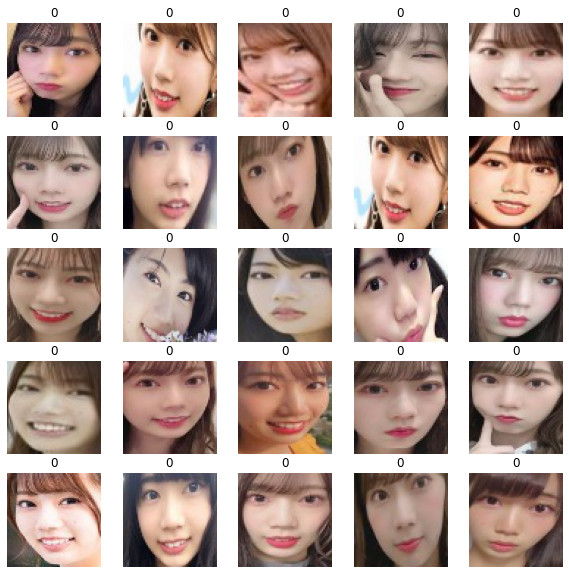

In [28]:
#画像とそのラベルの確認
import matplotlib.pyplot as plt

#画像データ読み込み
photos=np.load("./images/dataset.npz")
x=photos['x']
y=photos['y']

#開始インデックス
idx=0

#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title(y[i+idx])
    plt.axis('off')
    plt.imshow(x[i+idx])
plt.show()

In [15]:
y.shape

(400,)